In [6]:
import skimage
skimage.__version__

'0.15.0'

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
from skimage import io
kidney = io.imread('images/kidney3.PNG')

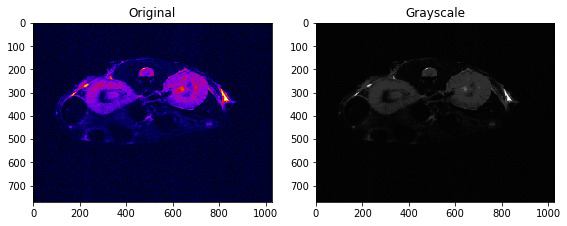

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2gray

original = io.imread('images/kidney3.PNG')
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

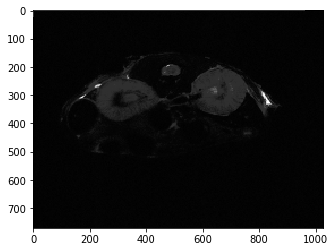

In [143]:
plt.imshow(grayscale, cmap=plt.cm.gray)

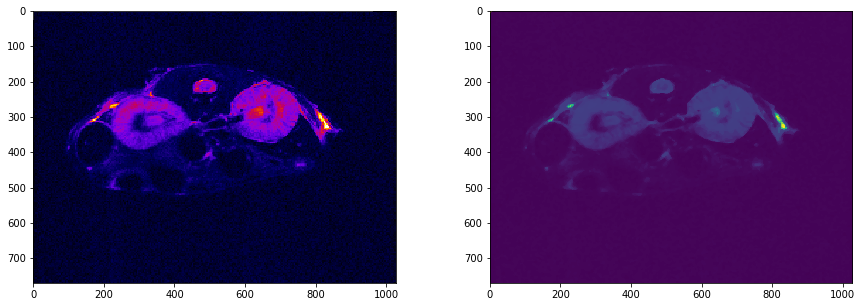

In [170]:
from skimage import filters 

kidneys_denoised = filters.median(grayscale, selem=np.ones((8, 9)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(original)
ax1.imshow(kidneys_denoised)

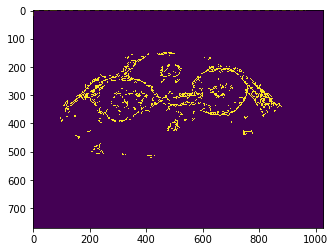

In [24]:
from skimage import feature
edges = skimage.feature.canny(grayscale, sigma=.000000000000001)

plt.imshow(edges);

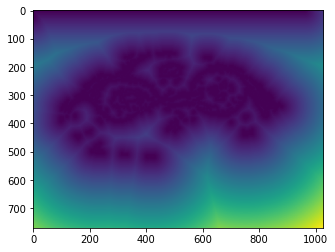

In [25]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from skimage import io

image = img_as_float(grayscale)
image = gaussian_filter(image, 5)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

NameError: name 'kidneys_denoised' is not defined

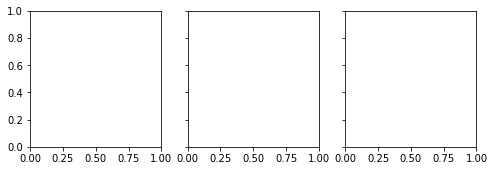

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(kidneys_denoised, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [133]:
h = 0.4
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

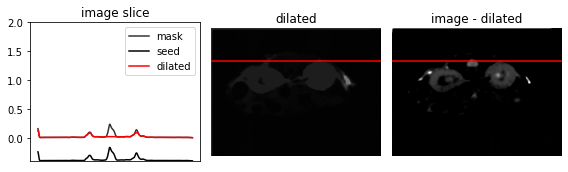

In [134]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 197

ax0.plot(mask[yslice], '0.2', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.4, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=1)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=1)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()

In [126]:
snake = seg.active_contour(img, grayscale)

In [10]:
from skimage import io
from skimage.viewer import ImageViewer

img = io.imread('images/kidney1.PNG')
viewer = ImageViewer(img)
viewer.show()

[]